In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

In [ ]:
def load_pulsar_data():
    df = pd.read_csv('pulsar_stars.csv')
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    return X, y

In [ ]:
def prepare_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=2)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    return X_train_scaled, X_test_scaled, X_train_pca, X_test_pca, y_train, y_test

In [ ]:
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, svm_params):
    svm = SVC(**svm_params)
    svm.fit(X_train, y_train)

    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return svm, accuracy

In [ ]:
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.colorbar(scatter)

    plt.title(title)
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')


Training linear kernel...
linear kernel completed - Accuracy: 0.973

Training poly kernel...
poly kernel completed - Accuracy: 0.973

Training rbf kernel...
rbf kernel completed - Accuracy: 0.975

Training sigmoid kernel...
sigmoid kernel completed - Accuracy: 0.832


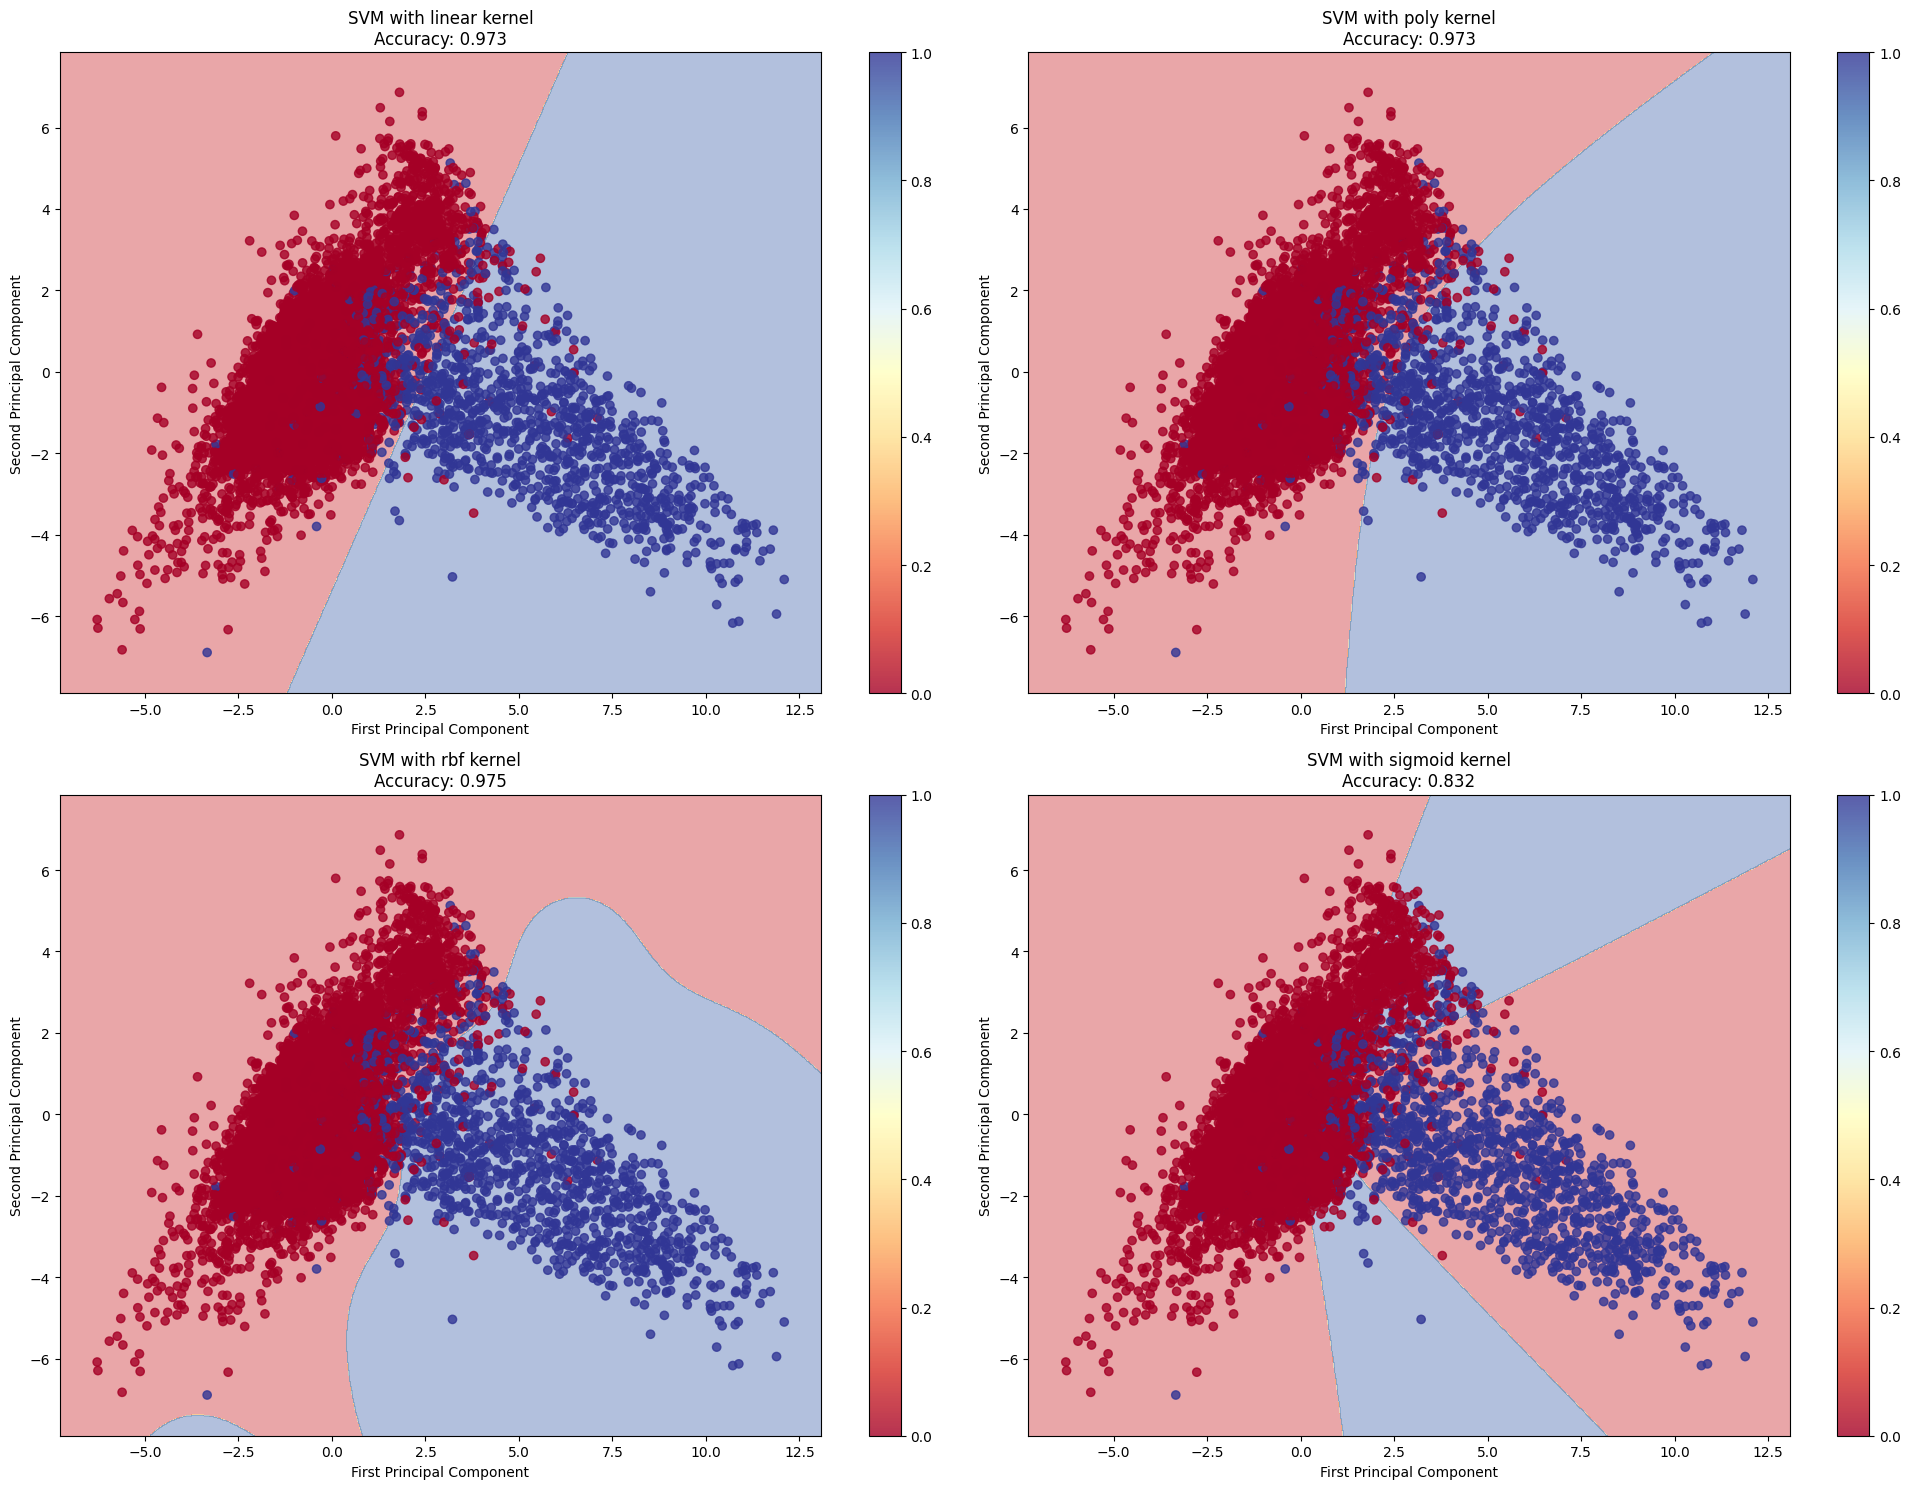


Kernel: linear
Parameters: {'kernel': 'linear', 'C': 0.1, 'random_state': 42}
Accuracy: 0.978

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3259
           1       0.95      0.80      0.87       321

    accuracy                           0.98      3580
   macro avg       0.96      0.90      0.93      3580
weighted avg       0.98      0.98      0.98      3580


Kernel: poly
Parameters: {'kernel': 'poly', 'C': 100.0, 'degree': 3, 'coef0': 1.0, 'gamma': 'scale', 'random_state': 42}
Accuracy: 0.979

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.93      0.83      0.88       321

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580


Kernel: rbf
Parameters: {'kernel': 'rbf', 'C': 10.0, 'gamma': 0.

In [ ]:
def main():
    X, y = load_pulsar_data()
    X_train_scaled, X_test_scaled, X_train_pca, X_test_pca, y_train, y_test = prepare_data(X, y)

    kernel_configs = {
        'linear': {
            'kernel': 'linear',
            'C': 0.1,
            'random_state': 42
        },
        'poly': {
            'kernel': 'poly',
            'C': 100.0,
            'degree': 3,
            'coef0': 1.0,
            'gamma': 'scale',
            'random_state': 42
        },
        'rbf': {
            'kernel': 'rbf',
            'C': 10.0,
            'gamma': 0.1,
            'random_state': 42
        },
        'sigmoid': {
            'kernel': 'sigmoid',
            'C': 500.0,
            'coef0': 0.01,
            'gamma': 'auto',
            'random_state': 42
        }
    }

    plt.figure(figsize=(20, 15))

    # Train and evaluate models with different kernels
    for i, (kernel_name, params) in enumerate(kernel_configs.items(), 1):
        print(f"\nTraining {kernel_name} kernel...")

        # Train model
        svm_model, accuracy = train_and_evaluate_svm(
            X_train_pca,
            X_test_pca,
            y_train,
            y_test,
            params
        )

        # Plot decision boundary
        plt.subplot(2, 2, i)
        plot_decision_boundary(
            X_train_pca,
            y_train,
            svm_model,
            f'SVM with {kernel_name} kernel\nAccuracy: {accuracy:.3f}'
        )
        print(f"{kernel_name} kernel completed - Accuracy: {accuracy:.3f}")

    plt.tight_layout()
    plt.show()

    for kernel_name, params in kernel_configs.items():
        svm_model, accuracy = train_and_evaluate_svm(
            X_train_scaled,
            X_test_scaled,
            y_train,
            y_test,
            params
        )
        print(f"\nKernel: {kernel_name}")
        print(f"Parameters: {params}")
        print(f"Accuracy: {accuracy:.3f}")
        print("\nClassification Report:")
        print(classification_report(y_test, svm_model.predict(X_test_scaled)))

if __name__ == "__main__":
    main()